In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import AnchoredText


In [134]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')
print("train size: ", df_train.shape, "test size: ", df_test.shape)
df_train.head()

train size:  (1460, 81) test size:  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [135]:
#set index as Id
df_train.set_index('Id',inplace=True)
df_test.set_index('Id',inplace=True)

In [136]:
na1=df_train.isna().sum()/df_train.shape[0]* 100
na2=df_test.isna().sum()/ df_test.shape[0]* 100
na = pd.DataFrame({"train" : na1, "test" : na2})
na = na[na>0].dropna(how="all")
print("number of columns with null values: ", na.shape[0])

na.sort_values(by="train", ascending=False)

number of columns with null values:  34


,train,test
PoolQC,99.520548,99.794380
MiscFeature,96.301370,96.504455
Alley,93.767123,92.666210
Fence,80.753425,80.123372
FireplaceQu,47.260274,50.034270
LotFrontage,17.739726,15.558602
GarageFinish,5.547945,5.346127
GarageQual,5.547945,5.346127
GarageType,5.547945,5.209047
GarageYrBlt,5.547945,5.346127


Target distribution skew:  1.8828757597682129


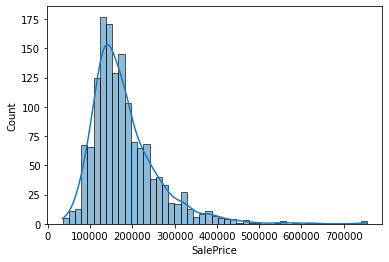

In [137]:
target='SalePrice'
sns.histplot(df_train[target],kde=True)
print("Target distribution skew: ", df_train[target].skew())

Log(Target) skew:  0.12133506220520406


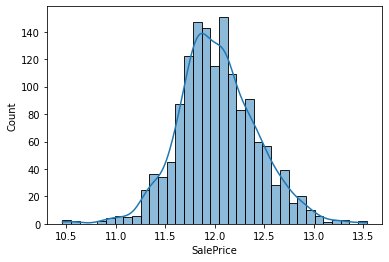

In [138]:
sns.histplot(np.log(df_train[target]),kde=True)
print("Log(Target) skew: ", np.log(df_train[target]).skew())

In [139]:
cat_cols=df_train.select_dtypes('object').columns.tolist()
num_cols=df_train.select_dtypes('number').columns.tolist()[:-1]


In [140]:
bivariate_cols = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "MiscVal", "PoolArea"]

num_cat_cols = [c for c in num_cols if c not in bivariate_cols]


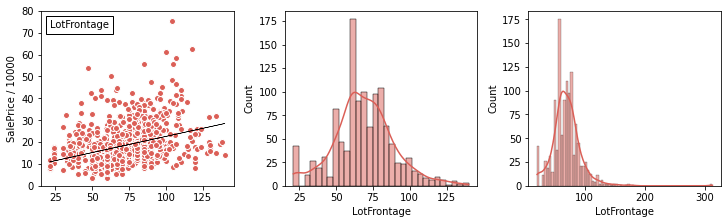

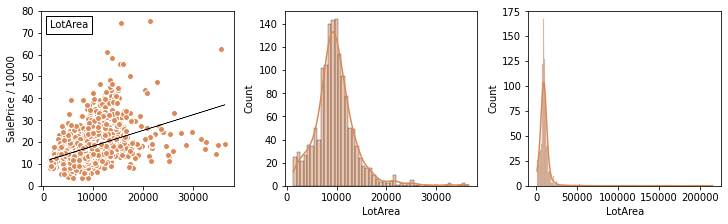

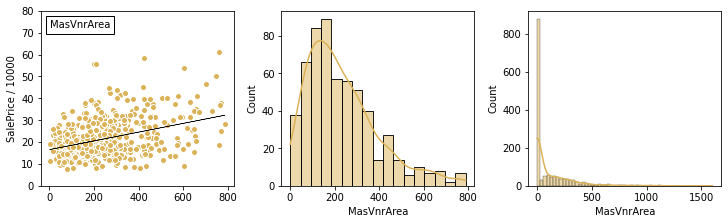

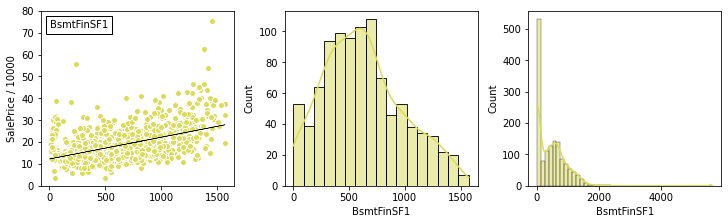

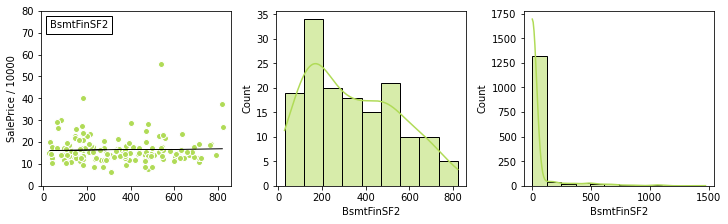

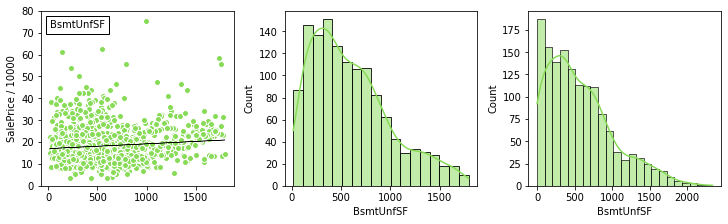

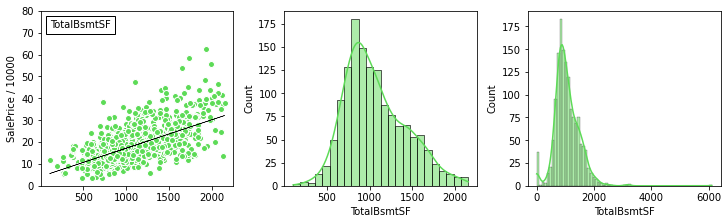

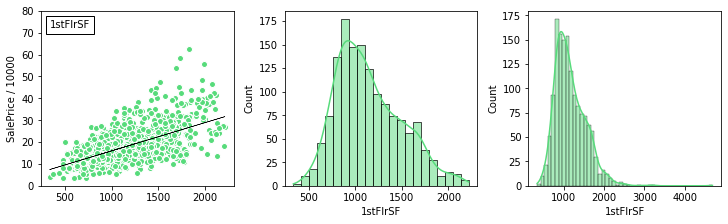

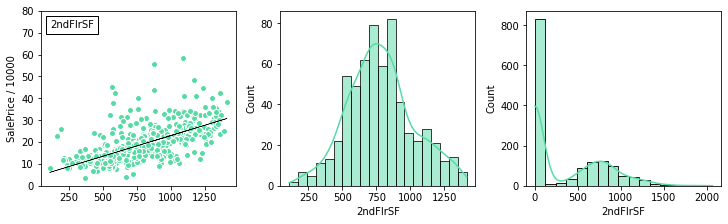

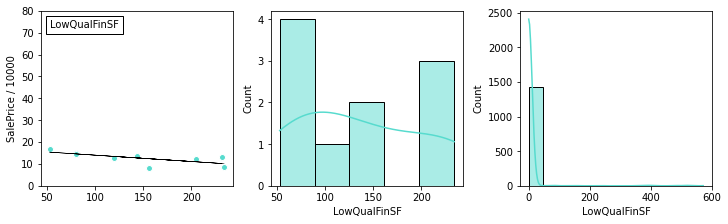

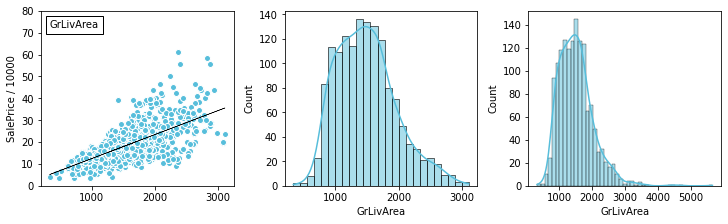

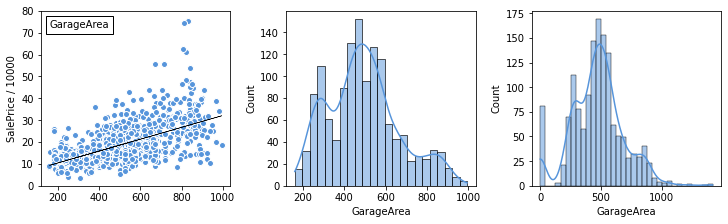

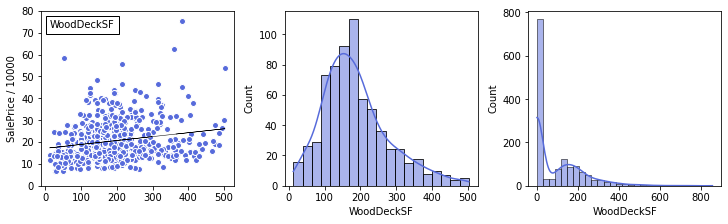

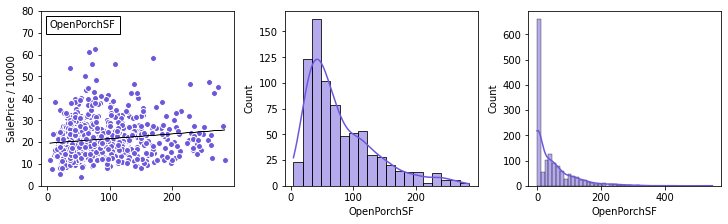

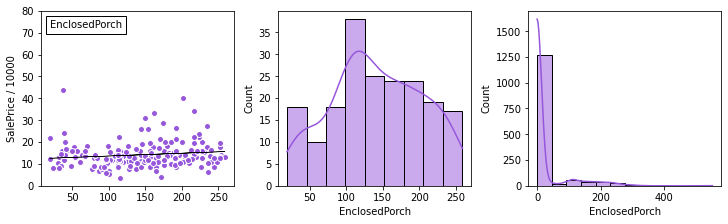

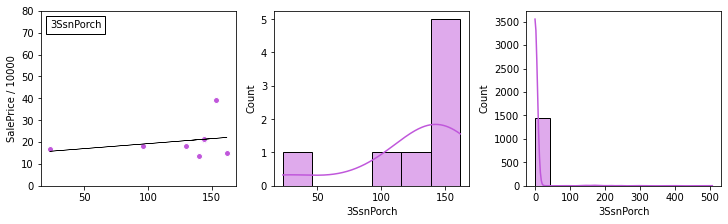

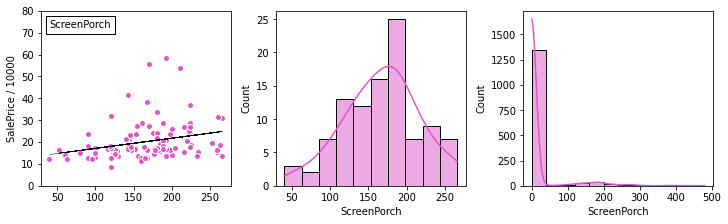

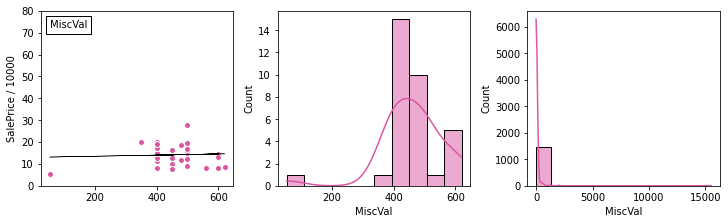

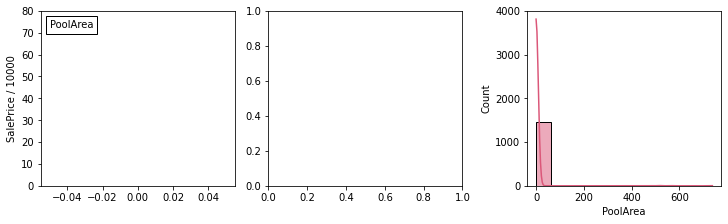

In [141]:
# Bivariate Columns
def plot_bivariate(cols, df=df_train, target="SalePrice"):
    colors = sns.color_palette("hls", len(cols))
    for col, c in zip(cols, colors):
        fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
        df1 = df_train.loc[(df_train[col] > 0) & (df_train[col] < df_train[col].quantile(0.99))]
        x, y = df1[col], df1[target]/10000
        
        ax1.plot(x, y, "o", color=c, mec="w")
        try:
            lin_model = np.poly1d(np.polyfit(x, y, 1))
            ax1.plot(x, lin_model(x), color="k", lw=0.5)
        except TypeError:
            pass
        ax1.add_artist(AnchoredText(col, loc=2))
        ax1.set_ylabel("SalePrice / 10000")
        ax1.set_ylim(0, 80)
        
        sns.histplot(df1[col], color=c, kde=True, ax=ax2)
        sns.histplot(df[col], color=c, kde=True, ax=ax3)

plot_bivariate(bivariate_cols)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


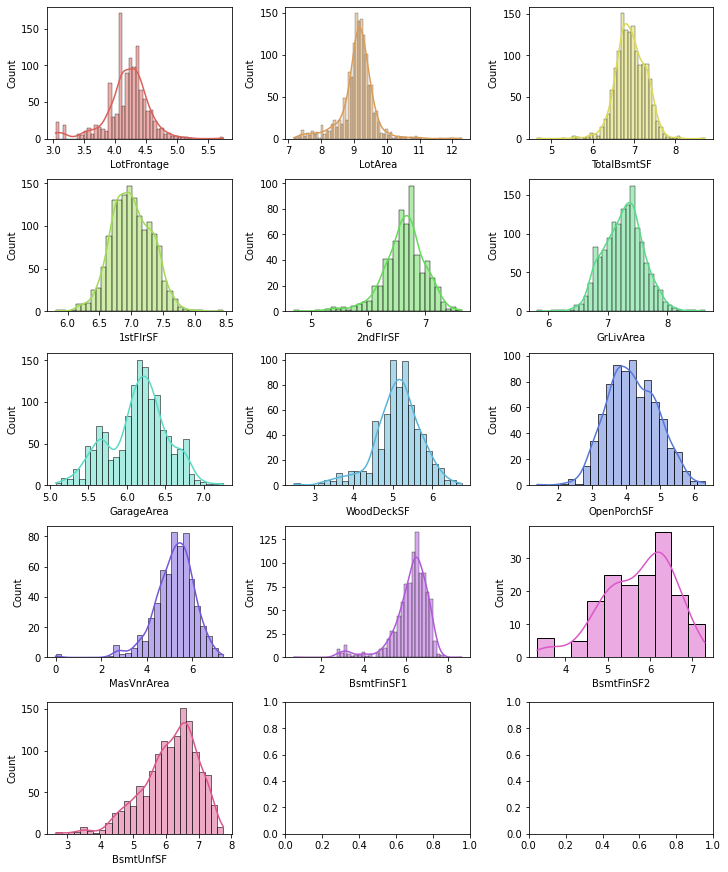

In [142]:
bivariate_cols = [
    "LotFrontage", "LotArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF",
    "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "MasVnrArea",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"
]

df_skew = np.log(df_train[bivariate_cols].copy())
df_skew[df_skew < 0] = np.nan  # mask zero values

fig, ax = plt.subplots(5, 3, figsize=(10, 12), constrained_layout=True)
colors = sns.color_palette("hls", len(bivariate_cols))
ax = ax.flatten()
for ax, col, c in zip(ax, bivariate_cols, colors):
    sns.histplot(df_skew[col], ax=ax, color=c, kde=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

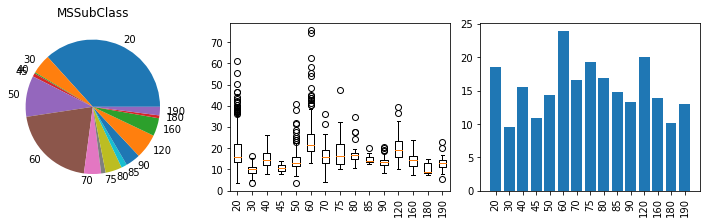

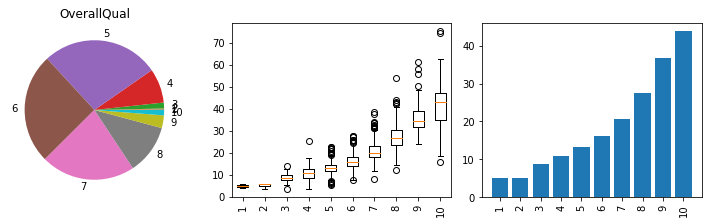

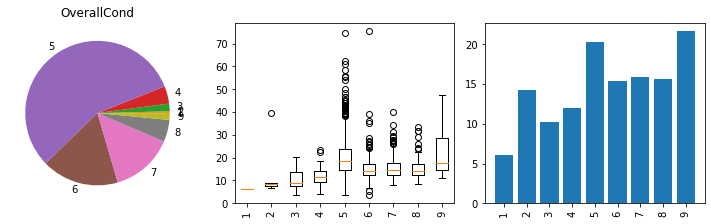

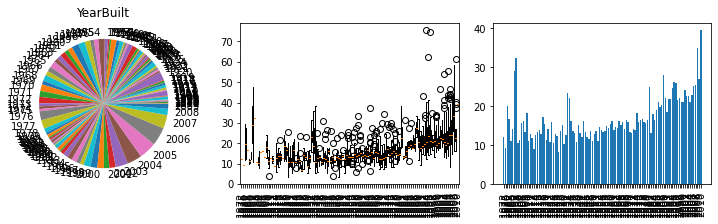

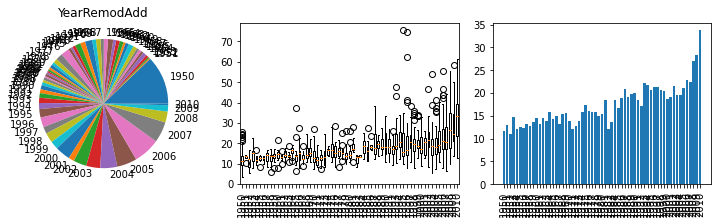

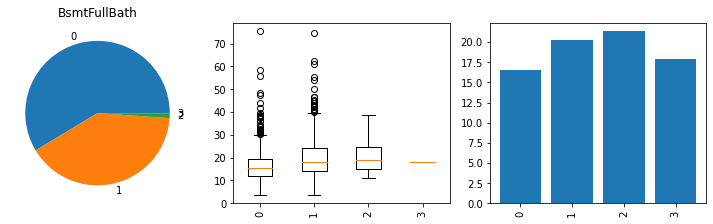

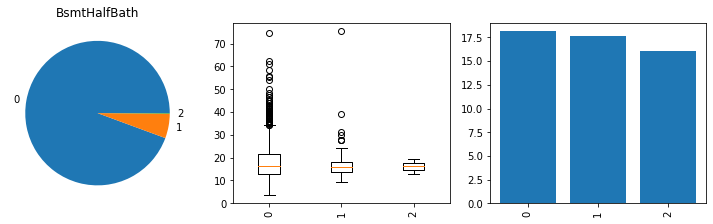

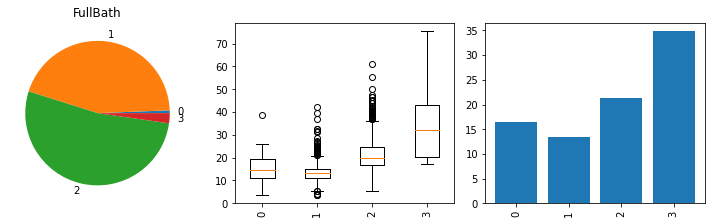

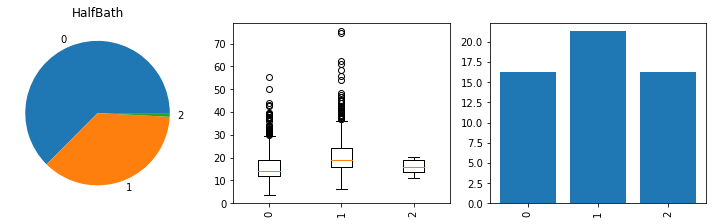

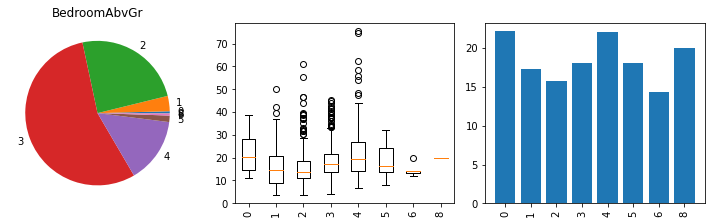

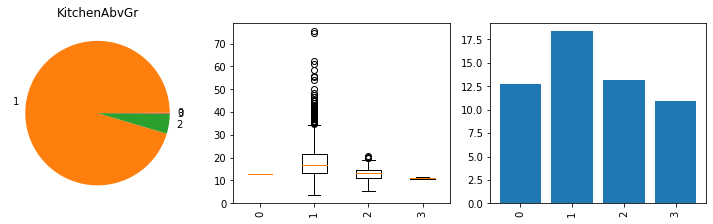

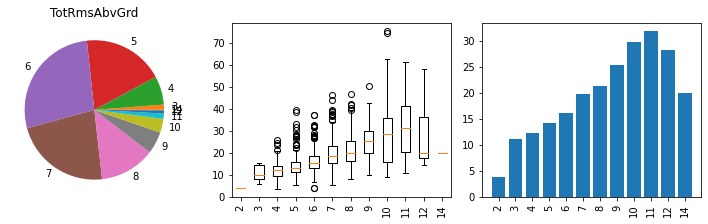

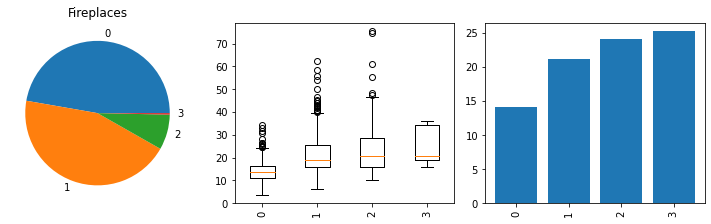

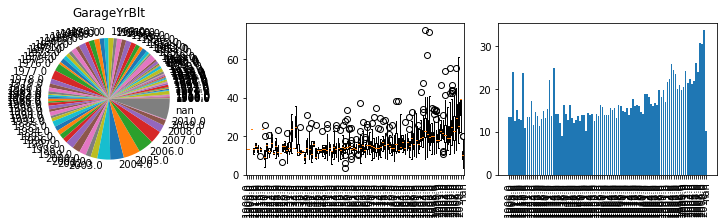

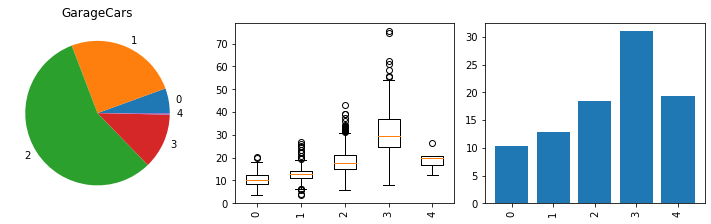

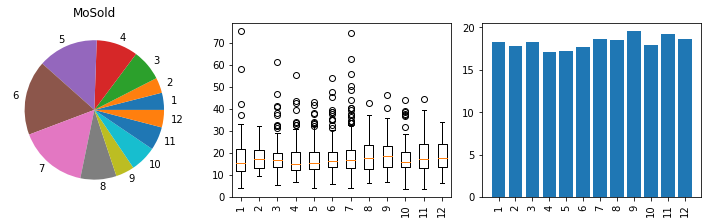

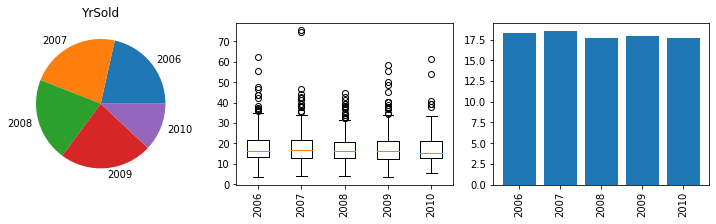

In [143]:
def plot_cat(cols, sort=True, df=df_train):
    colors = sns.color_palette("hls", len(cols))
    for n, c in zip(cols, colors):
        fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
        g = df.groupby(n, dropna=False)["SalePrice"]
        d = [a for a in g]
        g = g.agg(["count", "mean"])
        if sort:
            d.sort(key = lambda x: x[1].mean())
            g = g.sort_values(by="mean")
        data = [x[1]/10000 for x in d]
        labels = [x[0] for x in d]
        ax1.pie(g["count"], labels=g.index) #, autopct="%.1f%%")        
        ax2.boxplot(data)
        ax1.set_title(n)
        x = np.arange(1, g.shape[0]+1)
        ax2.set_xticks(x)
        ax2.set_xticklabels(labels, rotation=90)
        ax3.bar(x, g["mean"]/10000)
        ax3.set_xticks(x)
        ax3.set_xticklabels(labels, rotation=90)

plot_cat(num_cat_cols, sort=False)

In [144]:
num_cat_cols=[
    "OverallQual", "OverallCond", "FullBath", "HalfBath", "Fireplaces",
    "GarageCars", "TotRmsAbvGrd", "BedroomAbvGr", "KitchenAbvGr",
    "BsmtFullBath", "BsmtHalfBath"
]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

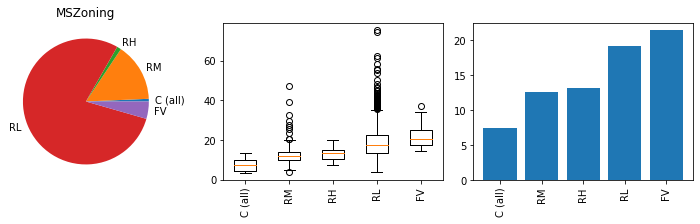

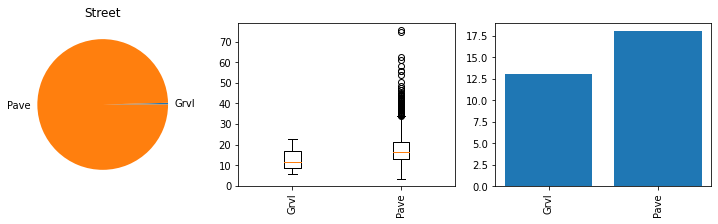

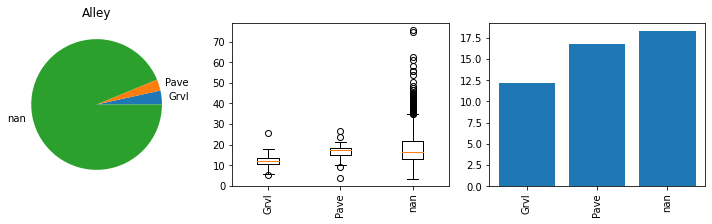

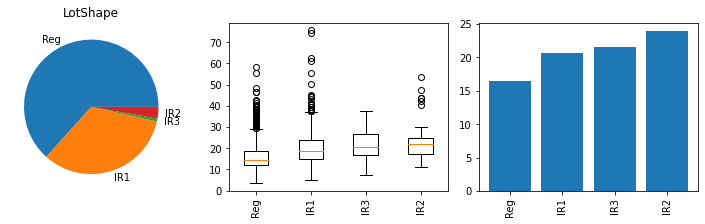

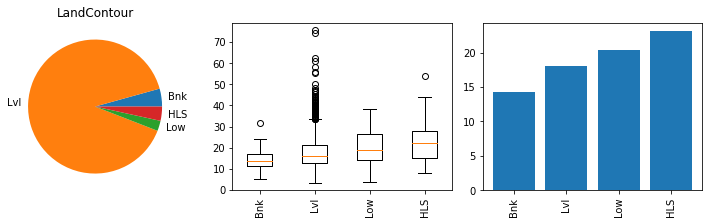

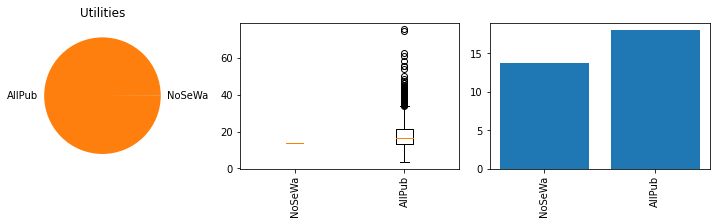

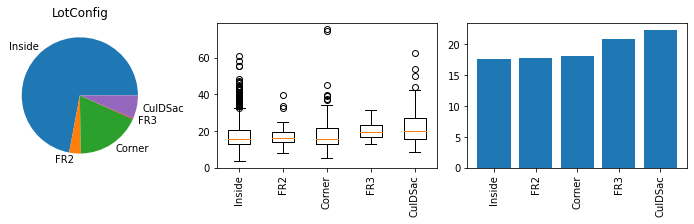

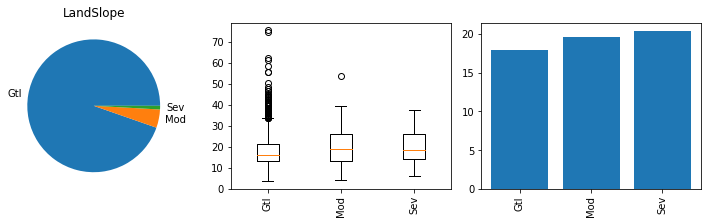

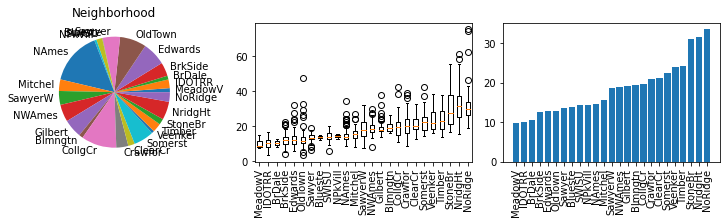

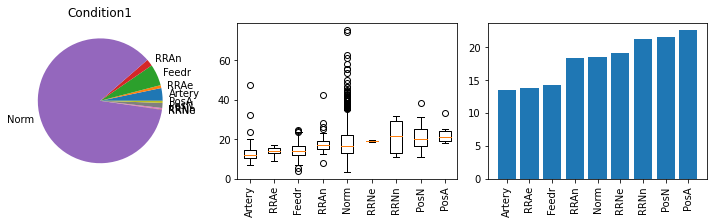

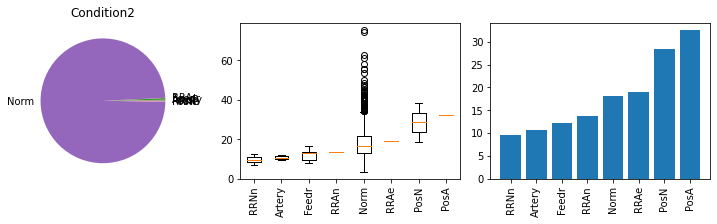

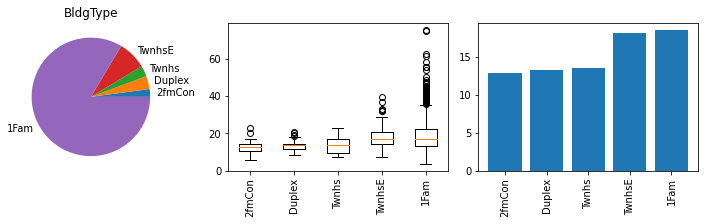

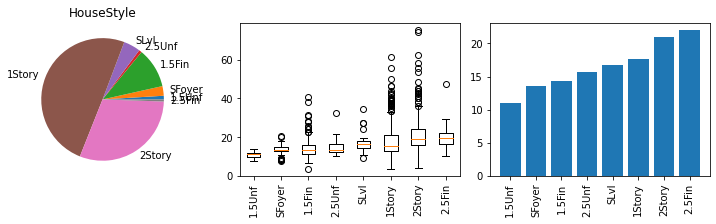

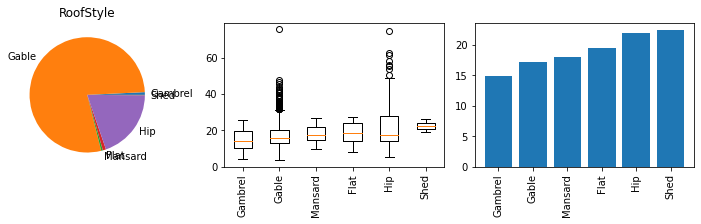

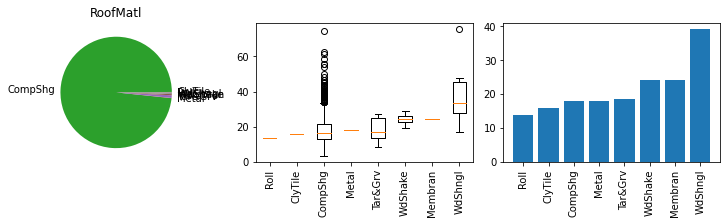

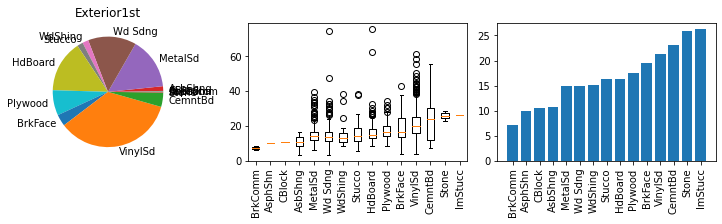

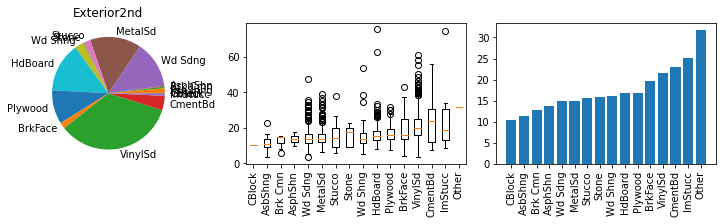

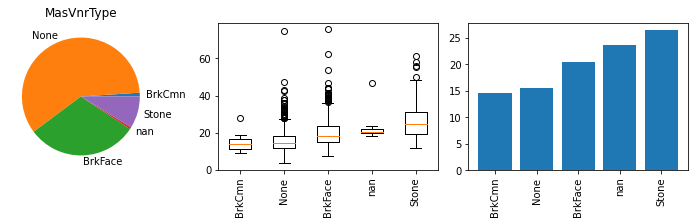

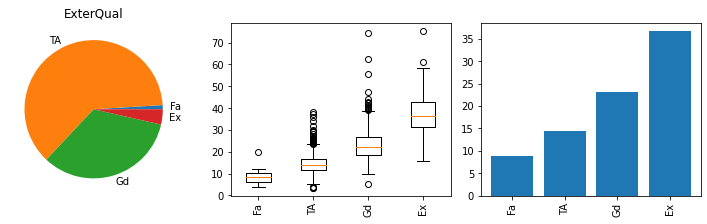

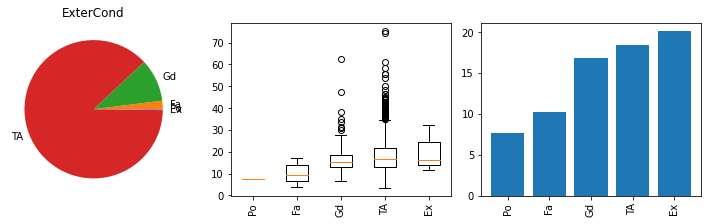

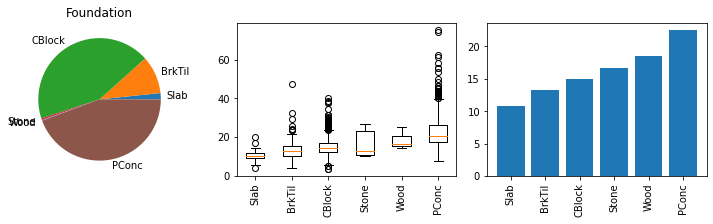

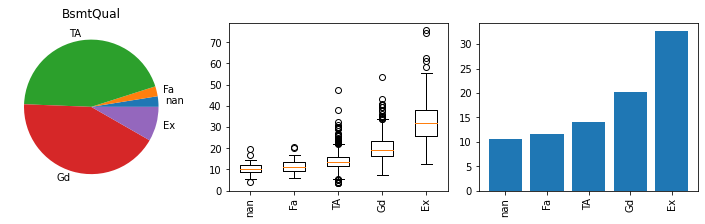

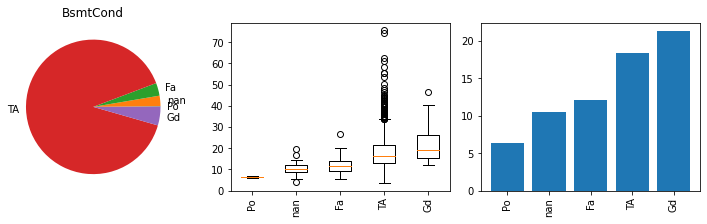

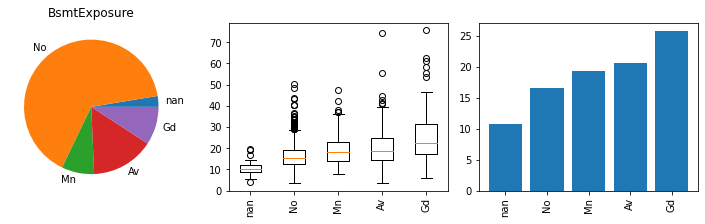

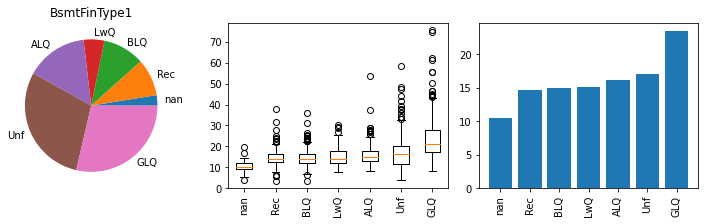

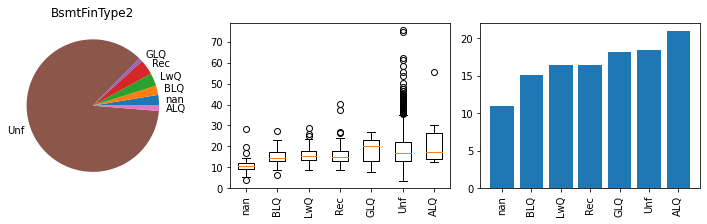

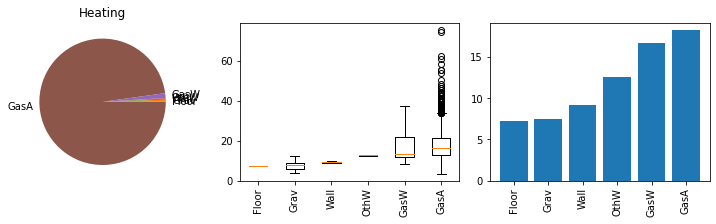

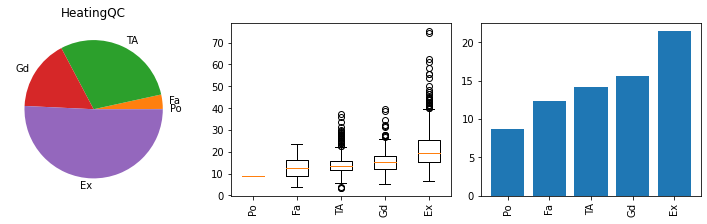

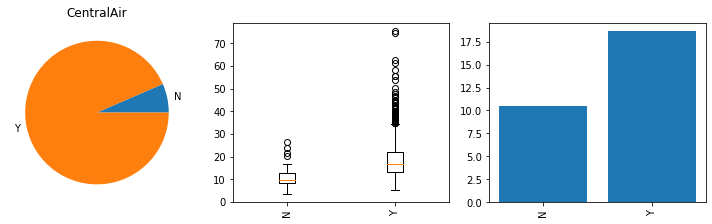

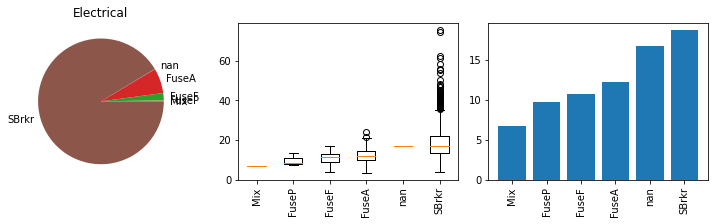

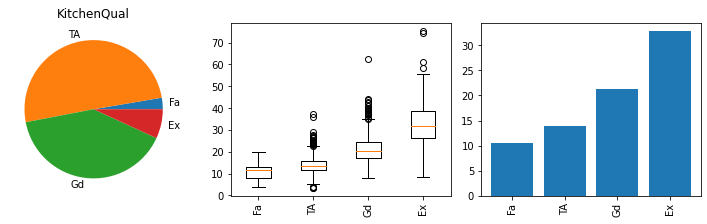

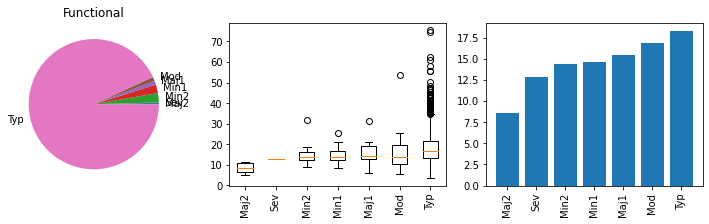

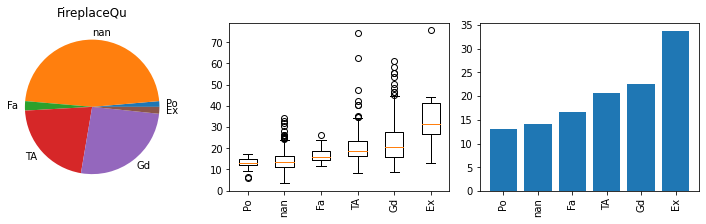

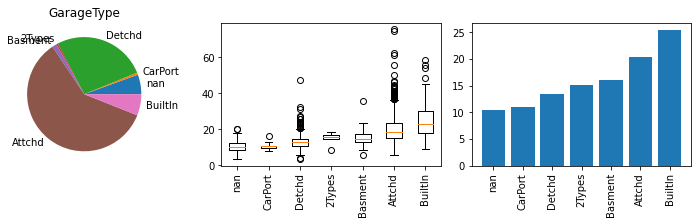

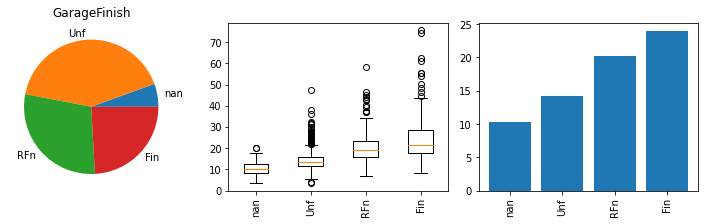

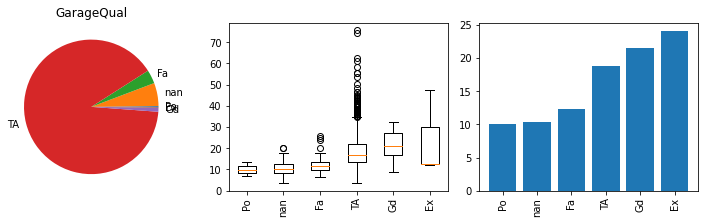

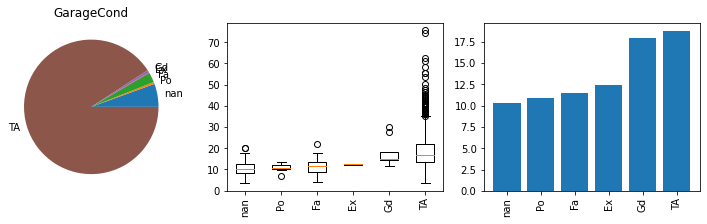

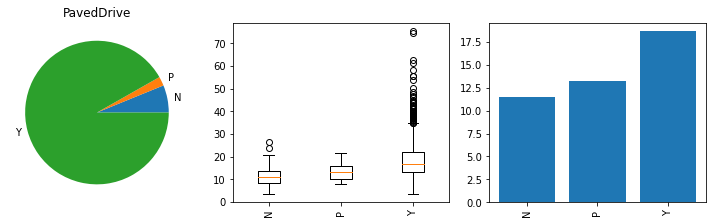

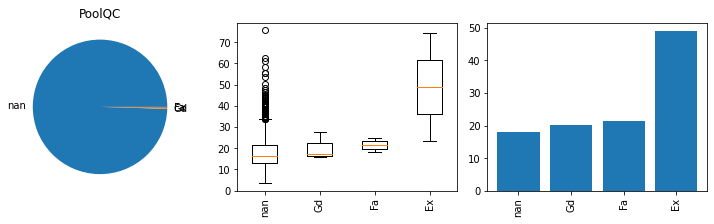

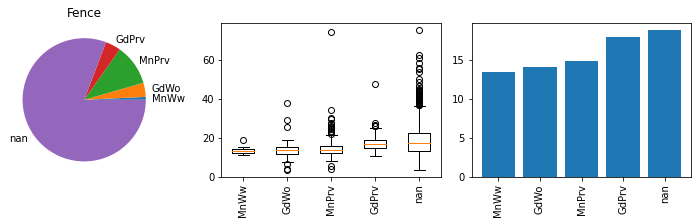

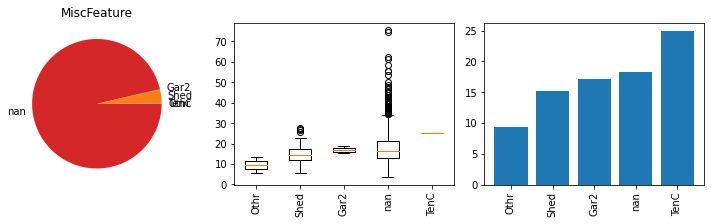

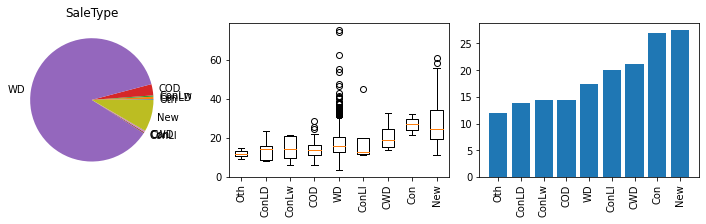

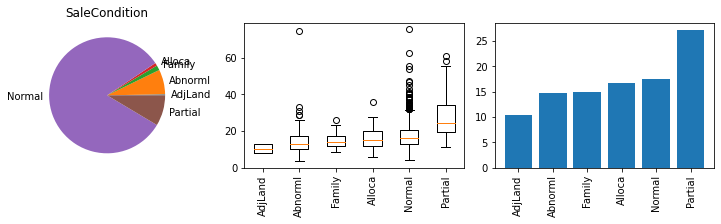

In [145]:
plot_cat(cat_cols)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

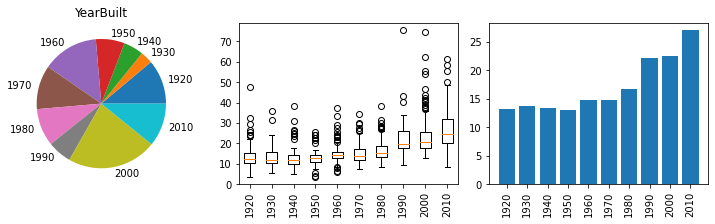

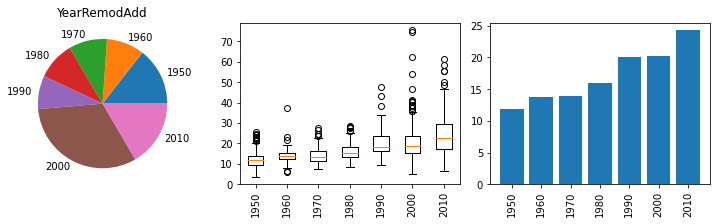

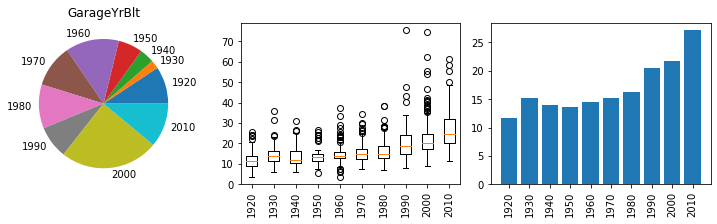

In [146]:
year_cols = ["YearBuilt", "YearRemodAdd", "GarageYrBlt"]
df_year = df_train[["SalePrice"] + year_cols].copy()
for col in year_cols:
    df_year[col] = df_year[col].fillna(0)
    df_year[col] = df_year[col].apply(lambda x: int(10 * np.round(float(x)/10)))

df_year.loc[df_year["YearBuilt"] < 1920, "YearBuilt"] = 1920
df_year.loc[df_year["GarageYrBlt"] < 1920, "GarageYrBlt"] = 1920

plot_cat(year_cols, df=df_year, sort=False)

In [147]:
cat_cols = [
    "ExterQual", "ExterCond", "BsmtCond", "BsmtQual", "GarageQual",
    "GarageCond", "HeatingQC", "KitchenQual", "FireplaceQu",
    "PoolQC", "Street", "Alley", "LotShape", "LandContour",
    "Condition1", "Condition2", "LandSlope", "BldgType", "MasVnrType",
    "Foundation", "BsmtExposure", "BsmtFinType1", "CentralAir",
    "RoofStyle", "GarageType", "GarageFinish", "PavedDrive", "Fence",
    "Neighborhood", "HouseStyle", "SaleType", "SaleCondition", "Electrical",
    "Exterior1st", "Exterior2nd", "Functional",
]

In [148]:
def ETL(filepath="/content/train.csv", val_map=None, one_hot_cols=True):
  df = pd.read_csv(filepath, index_col="Id")
  feat = df[bivariate_cols + year_cols + num_cat_cols + cat_cols].copy()
  df["MSZoning"] = df["MSZoning"].fillna(df["MSZoning"].mode()[0])
  frontage_group = df.groupby(["Neighborhood", "MSZoning"])["LotFrontage"]
  feat["LotFrontage"] = frontage_group.transform(lambda x: x.fillna(x.mean()))
  for col in bivariate_cols:
    with np.errstate(divide='ignore'):
      feat[col] = np.log(feat[col])
    feat.loc[feat[col] < 0, col] = np.nan
  
  for year in year_cols:
    feat[year] = feat[year].fillna(0)
    feat[year] = feat[year].apply(lambda x: int(10 * np.round(float(x)/10)))
  
  feat.loc[feat["YearBuilt"] < 1920, "YearBuilt"] = 1920
  feat.loc[feat["GarageYrBlt"] < 1920, "GarageYrBlt"] = 1920
  extmap = {
        "AsbShng": "Asb",
        "AsphShn": "Asb",
        "BrkComm": "BrkComm",
        "Brk Cmn": "BrkComm",
        "BrkFace": "BrkFace",
        "CBlock": "CBlock",
        "CemntBd": "CemntBd",
        "CmentBd": "CmentBd",
        "HdBoard": "HdBoard",
        "ImStucc": "Other",
        "MetalSd": "MetalSd",
        "Other": "Other",
        "Plywood": "Plywood",
        "PreCast": "PreCast",
        "Stone": "Stone",
        "Stucco": "Stucco",
        "VinylSd": "VinylSd",
        "Wd Sdng": "WdSd",
        "Wd Shng": "WdSd",
        "WdShing": "WdSh",
    }
  feat["Exterior1st"] = feat["Exterior1st"].map(extmap)
  feat["Exterior2nd"] = feat["Exterior2nd"].map(extmap)
  if "SalePrice" in df:
     val_map = {}
     for col in cat_cols:
       vals = df.groupby(col, dropna=False)["SalePrice"].mean()
       vals = vals.sort_values().index.tolist()
       vals = dict(zip(vals, range(len(vals))))
       feat[col] = feat[col].map(vals)
       val_map[col] = vals
  else:
      for col in cat_cols:
        feat[col] = feat[col].map(val_map[col])

  
  if one_hot_cols:
    onehot = pd.get_dummies(df["MSSubClass"], prefix="MSSubClass")
    subclasses = [
            20, 30, 40, 45, 50, 60, 70, 75,
            80, 85, 90, 120, 150, 160, 180, 190
        ]
    for val in subclasses:
      if f"MSSubClass_{val}" not in onehot.columns:
        onehot[f"MSSubClass_{val}"] = 0
    feat = pd.merge(feat, onehot, right_index=True, left_index=True)
   
  feat.fillna(0, inplace=True)


  if "SalePrice" in df:
        return feat, df["SalePrice"], val_map
  return feat

Top 10 features by correlations with SalePrice
SalePrice       1.000000
OverallQual     0.790982
Neighborhood    0.696882
GrLivArea       0.695118
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
BsmtQual        0.622925
1stFlrSF        0.591264
FullBath        0.560664
GarageFinish    0.549247
YearBuilt       0.544571
TotRmsAbvGrd    0.533723
GarageYrBlt     0.529308
FireplaceQu     0.525932
YearRemodAdd    0.512119
Foundation      0.505503
Name: SalePrice, dtype: float64


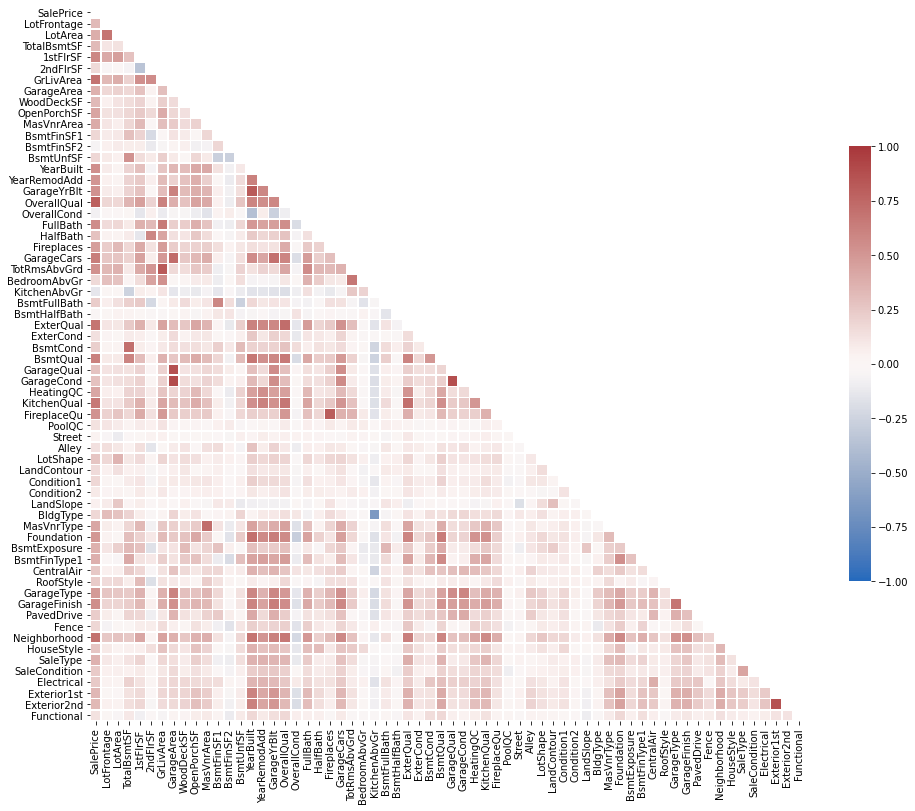

In [149]:
X, y, val_map = ETL(one_hot_cols=False)

covmat = pd.merge(y, X, right_index=True, left_index=True).corr()
mask = np.triu(np.ones_like(covmat, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16))
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(covmat, mask=mask, cmap=cmap, center=0, vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

print("Top 10 features by correlations with SalePrice")
print(covmat.loc[covmat["SalePrice"]>0.5, "SalePrice"].sort_values(ascending=False))


Top 10 features by correlations with SalePrice
SalePrice       1.000000
OverallQual     0.790982
Neighborhood    0.696882
GrLivArea       0.695118
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
BsmtQual        0.622925
1stFlrSF        0.591264
FullBath        0.560664
GarageFinish    0.549247
YearBuilt       0.544571
TotRmsAbvGrd    0.533723
GarageYrBlt     0.529308
FireplaceQu     0.525932
YearRemodAdd    0.512119
Foundation      0.505503
Name: SalePrice, dtype: float64


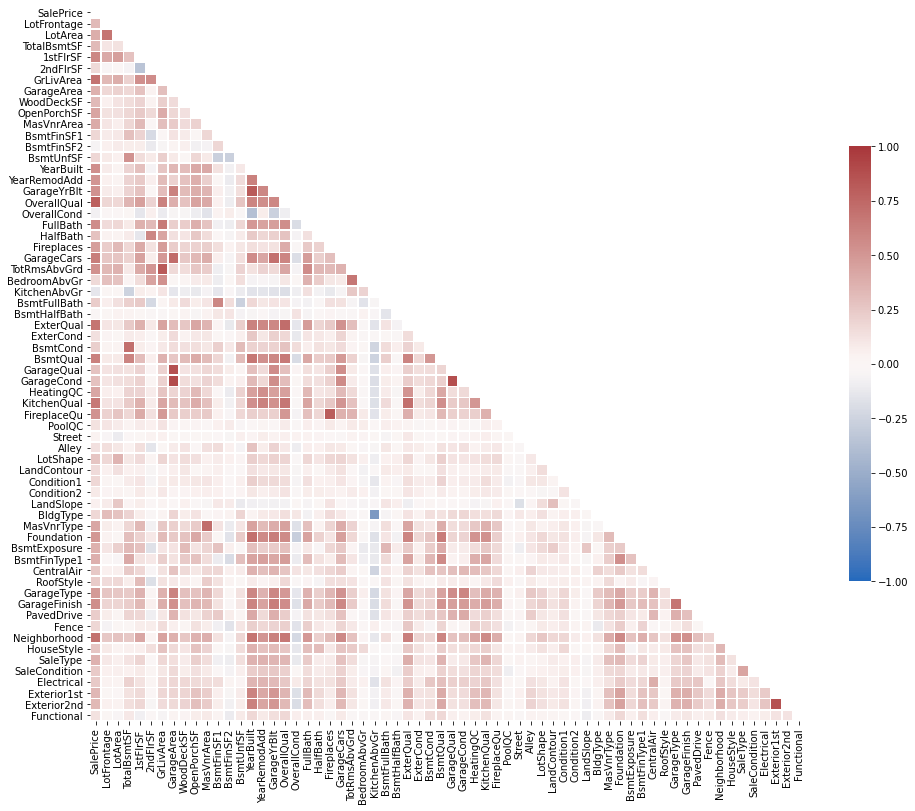

In [150]:
#Correlation Map

X, y, val_map = ETL(one_hot_cols=False)

covmat = pd.merge(y, X, right_index=True, left_index=True).corr()
mask = np.triu(np.ones_like(covmat, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16))
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(covmat, mask=mask, cmap=cmap, center=0, vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

print("Top 10 features by correlations with SalePrice")
print(covmat.loc[covmat["SalePrice"]>0.5, "SalePrice"].sort_values(ascending=False))

### Modelling

  ###### Train/Validation Split
  First apply the standard approach and split off 20% of the training data for validation





In [151]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

In [152]:
RANDOM_STATE=4829

X, y, val_map = ETL()

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE,
)

In [153]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
  print(f"train: {model.score(X_train, y_train):.5f}", end=" ")
  print(f"test: {model.score(X_test, y_test):.5f}")

  print(f"train: {mean_squared_log_error(y_train, model.predict(X_train)):.6f}", end=" ")
  print(f"test: {mean_squared_log_error(y_test, model.predict(X_test)):.6f}")

  fig, ax = plt.subplots(figsize=(6, 6))
  ax.plot(y_train/10000, np.array(model.predict(X_train))/10000, 'o', mec="w", label="train")
  ax.plot(y_test/10000, np.array(model.predict(X_test))/10000, 'o', mec="w", label="test")
  ax.plot([0,80],[0, 80], color='k', lw=0.5)
  ax.set_xlabel("SalePrice Ground Truth x10000")
  ax.set_ylabel("Predictions x10000")
  ax.legend(loc=2)

train: 0.88080 test: 0.85153
train: 0.015124 test: 0.014038


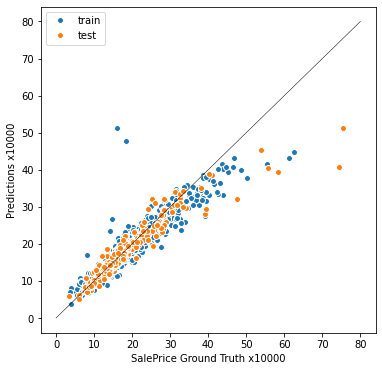

In [154]:
# Ridge Regressor Baseline
clf=Ridge(alpha=100)
tt=TransformedTargetRegressor(regressor=clf,func=np.log,inverse_func=np.exp)

model=Pipeline([
    ('sca', StandardScaler()),
    ('clf', tt)
])
model.fit(X_train, y_train)
evaluate_model(model, X_train, X_test, y_train, y_test)

prediction outliers indexes:  [1299, 524]


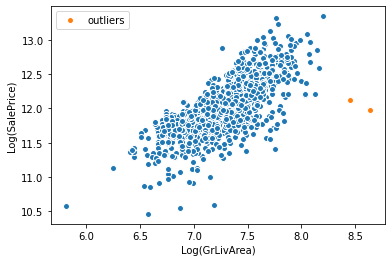

In [155]:
feats = pd.merge(y_train, X_train, left_index=True, right_index=True)
feats["preds"] = model.predict(X_train)
outliers = feats.loc[(feats["SalePrice"]<400000) & (feats["preds"]>400000)]
outliers = outliers.index.tolist()
print("prediction outliers indexes: ", outliers)

fig, ax = plt.subplots()
x, y = feats["GrLivArea"], np.log(feats["SalePrice"])

ax.plot(x, y, "o", mec="w")
ax.plot(x.loc[outliers], y.loc[outliers], "o", mec="w", label="outliers")
ax.set_xlabel("Log(GrLivArea)")
ax.set_ylabel("Log(SalePrice)")
_ = ax.legend()

#### XGBoost Regressor

Here we use XGBRegressor, which is an sklearn compatible class that works as a drop-in replacement for other scikit-learn models.

Let's first try it with the default hyperparameter values for regression problems, using reg:squarederror as the objective. The tree_method is set to the default auto, which chooses the most conservative option available. This was chosen primarily because it was the option used when developing this notebook offline.

train: 0.95797 test: 0.76372
train: 0.007190 test: 0.019920


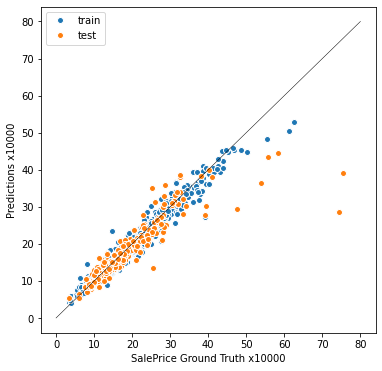

In [156]:
clf = XGBRegressor(
    objective="reg:squarederror",
    random_state=RANDOM_STATE,
)

tt = TransformedTargetRegressor(regressor=clf, func=np.log, inverse_func=np.exp)

model = Pipeline([
    ('sca', StandardScaler()),
    ('clf', tt)
])

model.fit(X_train, y_train)

evaluate_model(model, X_train, X_test, y_train, y_test)

In [157]:
clf = XGBRegressor(
    objective="reg:squarederror",
    n_jobs=-1,
    learning_rate=0.1,
    random_state=RANDOM_STATE)

parameters = {
    "clf__regressor__max_depth": [2, 3],
    "clf__regressor__n_estimators": [50, 100, 200],
    "clf__regressor__colsample_bytree": [0.5, 0.7],
    "clf__regressor__reg_lambda": [0, 1],
}

tt = TransformedTargetRegressor(regressor=clf, func=np.log, inverse_func=np.exp)

pipeline = Pipeline([
    ('sca', StandardScaler()),
    ('clf', tt)
])

Optimised Parameters
clf__regressor__colsample_bytree: 0.5
clf__regressor__max_depth: 3
clf__regressor__n_estimators: 200
clf__regressor__reg_lambda: 0
train: 0.97812 test: 0.82421
train: 0.003904 test: 0.017194


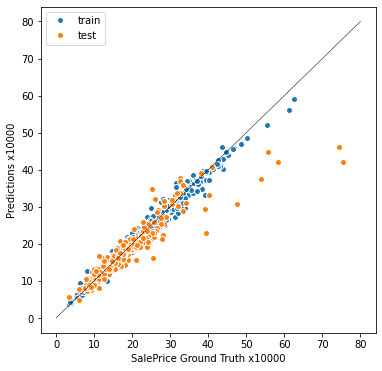

In [158]:
model = GridSearchCV(
    pipeline,
    param_grid=parameters,
    scoring="r2"
)

model.fit(X_train, y_train)

print("Optimised Parameters")
for k, v in model.best_params_.items():
    print(f"{k}: {v}")

evaluate_model(model, X_train, X_test, y_train, y_test)


train: 0.97229 test: 0.97402
train: 0.005120 test: 0.005091


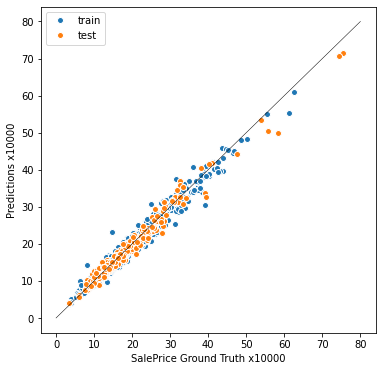

In [159]:
model=model.best_estimator_
X,y,val_map=ETL()
model.fit(X,y)
evaluate_model(model, X, X_test, y, y_test)


In [160]:
unlabeled=ETL('/content/test.csv',val_map=val_map)
unlabeled["SalePrice"] = model.predict(unlabeled)


In [161]:
unlabeled["SalePrice"].to_csv("submission.csv")

In [163]:
from google.colab import files
files.download("submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>